In [1]:
# change the directory to EC523_Project_G
%cd ..
%pwd

d:\LocalLaptop\BU\courses\2024-Spring\EC523_CS523\Project01\EC523_Project_G


'd:\\LocalLaptop\\BU\\courses\\2024-Spring\\EC523_CS523\\Project01\\EC523_Project_G'

In [2]:
from src import data

Start Loading Metadata...
series_name: cute
	 ep_name: cute08
		 scene idx: 0
		 scene idx: 1
		 scene idx: 2
		 scene idx: 3
		 scene idx: 4
		 scene idx: 5
		 scene idx: 6
		 scene idx: 7
		 scene idx: 8
		 scene idx: 9
		 scene idx: 10
		 scene idx: 11
		 scene idx: 12
		 scene idx: 13
		 scene idx: 14
		 scene idx: 15
		 scene idx: 16
		 scene idx: 17
		 scene idx: 18
		 scene idx: 19
		 scene idx: 20
		 scene idx: 21
		 scene idx: 22
		 scene idx: 23
		 scene idx: 24
		 scene idx: 25
		 scene idx: 26
		 scene idx: 27
		 scene idx: 28
		 scene idx: 29
		 scene idx: 30
		 scene idx: 31
		 scene idx: 32
		 scene idx: 33
		 scene idx: 34
		 scene idx: 35
		 scene idx: 36
		 scene idx: 37
		 scene idx: 38
		 scene idx: 39
		 scene idx: 40
		 scene idx: 41
		 scene idx: 42
		 scene idx: 43
		 scene idx: 44
		 scene idx: 45
		 scene idx: 46
		 scene idx: 47
		 scene idx: 48
		 scene idx: 49
		 scene idx: 50
		 scene idx: 51
		 scene idx: 52
		 scene idx: 53
		 scene idx: 54
		 scene idx:

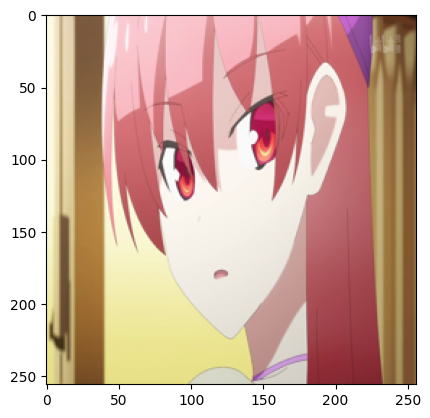

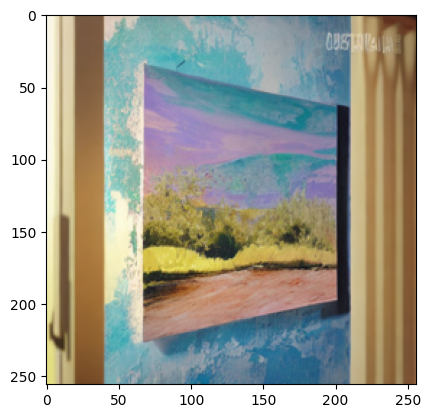

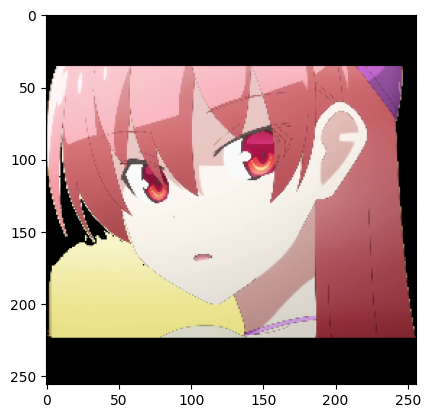

In [ ]:
PHASE3_SCENE_DESCRIPTION_FILE = "./DATASET/PROCESSING_RECORD_PHASE3_SCENE_DESCRIPTION.json"
dataset_path = "./" # adjust the path to the dataset
data_loader = data.get_dataloader(PHASE3_SCENE_DESCRIPTION_FILE, dataset_path=dataset_path, MAX_NUM_FIGURE=5, batch_size=4, shuffle=False)
data.display_data(data_loader, num_of_batch=1)